# Multiple Regression Models for Car Prices 

## Load Data

In [121]:
car <- read.csv("DataShortProject1 - Tanisha Gupta.csv")

In [122]:
#car

## Model 1

#### a)

In [123]:
model1 = lm(car$price ~ car$miles + car$age)

In [124]:
summary(model1)


Call:
lm(formula = car$price ~ car$miles + car$age)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6831 -1.6716 -0.3036  0.8781  5.4900 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.69689    0.84081  32.941  < 2e-16 ***
car$miles   -0.06849    0.01157  -5.922 2.26e-06 ***
car$age     -0.61163    0.08473  -7.218 7.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.445 on 28 degrees of freedom
Multiple R-squared:  0.907,	Adjusted R-squared:  0.9004 
F-statistic: 136.6 on 2 and 28 DF,  p-value: 3.604e-15


In [125]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
car$miles,1,1321.3189,1321.318940,221.06705,8.134837e-15
car$age,1,311.4346,311.434590,52.10546,7.401798e-08
Residuals,28,167.3561,5.977005,NA,NA


#### b)

In [126]:
thingy <- rstandard(model1)

In [127]:
thingy[1]

1 
0.9858075

#### c)

In [128]:
summary(model1)


Call:
lm(formula = car$price ~ car$miles + car$age)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6831 -1.6716 -0.3036  0.8781  5.4900 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.69689    0.84081  32.941  < 2e-16 ***
car$miles   -0.06849    0.01157  -5.922 2.26e-06 ***
car$age     -0.61163    0.08473  -7.218 7.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.445 on 28 degrees of freedom
Multiple R-squared:  0.907,	Adjusted R-squared:  0.9004 
F-statistic: 136.6 on 2 and 28 DF,  p-value: 3.604e-15


The null hypothesis is that neither miles and age are good predictors for the price. The alternate hypothesis is that they are good predictors for the price. Both of the predictors have a signifacance of less than 0.001 (2.26e-06 and 7.40e-08, respectively), which means that they are both very good predictors for the price.

#### d)

The null hypothesis is that the model is not a good predictor for the price. The alternate hypothesis is that it is a good predictor for the price. The P-value is is 3.604e-15 which is much lower than the threshold and therefore means that the model is a good predictor for the price. 

## Model 2

#### a)

In [129]:
#car$miles2 <- car$miles^2

In [130]:
#car$age2 <- car$age^2

In [131]:
attach(car)

The following objects are masked from car (pos = 3):

    age, miles, price


The following objects are masked from car (pos = 4):

    age, miles, price




In [132]:
qModel = lm(price ~ age + I(age^2))

In [133]:
summary(qModel)


Call:
lm(formula = price ~ age + I(age^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5801 -1.3896 -0.0338  1.8999  4.9116 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.277978   1.096968  26.690  < 2e-16 ***
age         -1.952484   0.203996  -9.571 2.51e-10 ***
I(age^2)     0.040194   0.007769   5.174 1.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.624 on 28 degrees of freedom
Multiple R-squared:  0.8929,	Adjusted R-squared:  0.8853 
F-statistic: 116.8 on 2 and 28 DF,  p-value: 2.601e-14


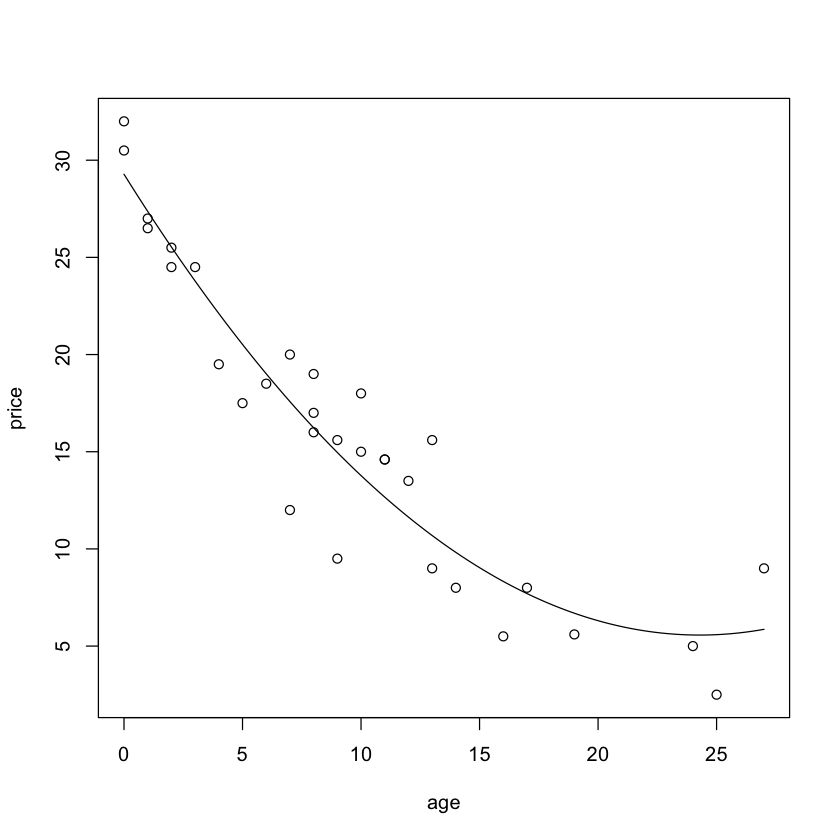

In [134]:
plot(price ~ age, car)
curve(predict(qModel,newdata=data.frame(age=x)),add=T)

#### b)

There is no point in time where there is a negative or zero prediction for the car price.

#### c)

Cars that are very old seem to have a price that goes up rather than goes down. I think that's a flaw of the quadratic model. At least this model solves, the free car problem though.  

#### d)

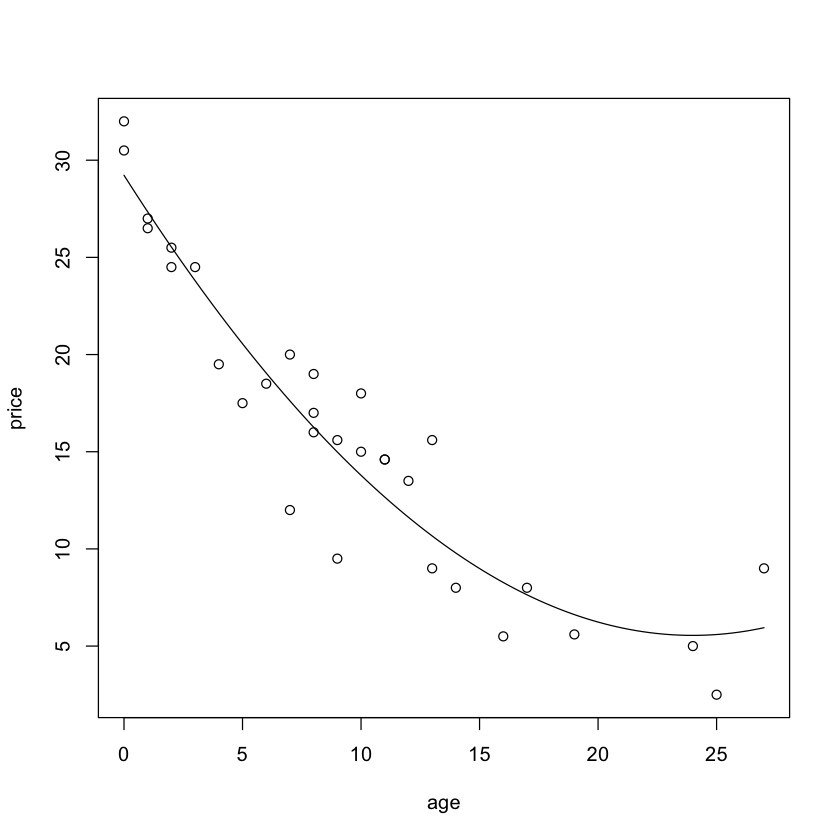

In [135]:
cModel <- lm(price~poly(age,3,raw=TRUE),car)
plot(price~age,car)
curve(predict(cModel,newdata=data.frame(age=x)),add=T)

As you can see above the fit stayed pretty much the same whether it was quadratic or cubic. 

## Model 3

#### a)

Second order Model: (coefficient)x_1 + (coefficient)x_1^2 + (coefficient)x_2 + (coefficient)x_2^2 + (coefficient)x_1*x_2

#### b)

In [136]:
secondorder = lm(price~age + I(age^2) + miles + I(miles^2) + age:miles, data=car)

In [137]:
summary(secondorder)


Call:
lm(formula = price ~ age + I(age^2) + miles + I(miles^2) + age:miles, 
    data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7780 -1.1570 -0.0203  1.2827  3.4587 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.034e+01  8.987e-01  33.763  < 2e-16 ***
age         -1.293e+00  2.608e-01  -4.958 4.15e-05 ***
I(age^2)     1.682e-02  9.019e-03   1.865   0.0740 .  
miles       -7.411e-02  3.611e-02  -2.052   0.0508 .  
I(miles^2)  -7.445e-05  3.104e-04  -0.240   0.8124    
age:miles    2.575e-03  3.011e-03   0.855   0.4005    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.805 on 25 degrees of freedom
Multiple R-squared:  0.9548,	Adjusted R-squared:  0.9457 
F-statistic: 105.5 on 5 and 25 DF,  p-value: 5.622e-16


In [138]:
anova(secondorder)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1423.144415,1423.144415,436.8769208,2.384886e-17
I(age^2),1,184.236123,184.236123,56.5568113,7.116279e-08
miles,1,102.046330,102.046330,31.3261857,8.023069e-06
I(miles^2),1,6.860899,6.860899,2.1061591,1.591409e-01
age:miles,1,2.383389,2.383389,0.7316529,4.004716e-01
Residuals,25,81.438521,3.257541,NA,NA


#### c)

In [139]:
anova(secondorder)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1423.144415,1423.144415,436.8769208,2.384886e-17
I(age^2),1,184.236123,184.236123,56.5568113,7.116279e-08
miles,1,102.046330,102.046330,31.3261857,8.023069e-06
I(miles^2),1,6.860899,6.860899,2.1061591,1.591409e-01
age:miles,1,2.383389,2.383389,0.7316529,4.004716e-01
Residuals,25,81.438521,3.257541,NA,NA


In [140]:
firstorder = lm(price~age*miles)

In [141]:
anova(firstorder , secondorder)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27,95.35093,NA,NA,NA,NA
2,25,81.43852,2,13.91241,2.135415,0.1392554


In [142]:
anova(qModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1423.1444,1423.144415,206.75671,1.869318e-14
I(age^2),1,184.2361,184.236123,26.76612,1.725508e-05
Residuals,28,192.7291,6.883184,NA,NA


In [143]:
anova(qModel , secondorder)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,192.72914,NA,NA,NA,NA
2,25,81.43852,3,111.2906,11.388,6.748875e-05


## Wrap Up:

In conclusion, the best model out of all the three that I analyzed in this notebook is the full second order model. The null hypothesis was that none of the models would be good predictors (not statistically significant). Alternate hypotheses include any of the three being the best model (statistically significant and highest Adjusted R-squared). The full second order predictor on the age and the miles had the highest Adjusted R-squared with 94.57% of the variance explained by the model. The linear model with both age and miles had the next best adjusted R-squared with 90.04% of the variance explained by the model. The quadratic model with just age was the worst with an adjusted R-squared of 88.53% of the variance explained by the model. All of the models were statistically significant with their p-values being under 0.001. 